In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("Ozone_PreProcessed_df.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Ozone Mean (ppm),Ozone Max (ppm),ozone_threshold,popSize_greater4mill,popSize_less4million,County_Dallas,County_Harris,County_LosAngeles,County_Maricopa,County_MiamiDade,...,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,popSize_less4million.1
0,-0.329758,-0.468495,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,-0.681090,-0.847152,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,-1.219302,-0.772934,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,-1.049085,-0.595841,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,-0.848015,-0.860675,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

y = df.ozone_threshold
X = df.loc[:, df.columns != 'ozone_threshold']

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(X_test), y_test))

0.9923329682365827


In [3]:
y_pred = clf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [4]:
#Cross-Validation:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.992


In [5]:
#Confusion Matrix  
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)  #the confusion matrix actually looks like I expected it too!

#correct predictions: 760 + 37 = 797
#incorrect predictions: 102 + 14 = 116

[[770   4]
 [  3 136]]


In [6]:
#model accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [7]:
#Classification Report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#high percentage to base ozone-related air health concerns based on county, month of year, and population

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       774
           1       0.97      0.98      0.97       139

    accuracy                           0.99       913
   macro avg       0.98      0.99      0.99       913
weighted avg       0.99      0.99      0.99       913



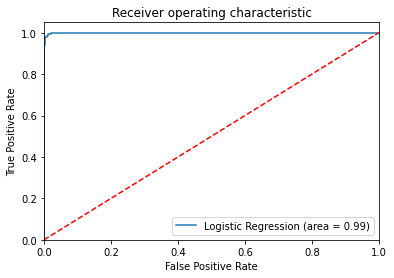

In [8]:
#ROC, AUC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()  #that's a good looking ROC, lots supporting the TPR

In [9]:
#CV gridsearch "blackbox"
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.1, 1, 10, 100]}
clf = LogisticRegression()
logreg_cv = GridSearchCV(estimator = clf, 
                    cv = 5, param_grid = param_grid)
logreg_cv.fit(X_test, y_test)
print(accuracy_score(logreg_cv.predict(X_test), y_test))
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

0.9945235487404163
{'C': 10}
0.9835706462212487


In [10]:
#two additional models? Decision Tree, Random Forest (2hours?)
#adjusting categories in models?
#model paramters?

In [11]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_leaf_nodes=10,random_state=42)
DT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [12]:
y_pred_DT = DT.predict(X_test)

y_pred_DT[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
y_test[:10]

3237    0
3578    0
2469    0
278     0
3435    0
1732    0
978     0
3030    0
1438    0
684     0
Name: ozone_threshold, dtype: int64

In [14]:
accuracy_score(y_test,y_pred_DT)


1.0